<a href="https://colab.research.google.com/github/colmBandit/AnacondaML/blob/main/KNN_Emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [27]:
# Load the MNIST dataset
(x_data, y_data), (x_test_full, y_test_full) = mnist.load_data()

In [33]:
# Print the shapes of the datasets
print(f"Full dataset shape: {x_data.shape}")
print(f"Full labels shape: {y_data.shape}")
print(f"Full test data shape: {x_test_full.shape}")
print(f"Full test labels shape: {y_test_full.shape}")

Full dataset shape: (60000, 28, 28)
Full labels shape: (60000,)
Full test data shape: (10000, 28, 28)
Full test labels shape: (10000,)


In [19]:
import matplotlib.pyplot as plt

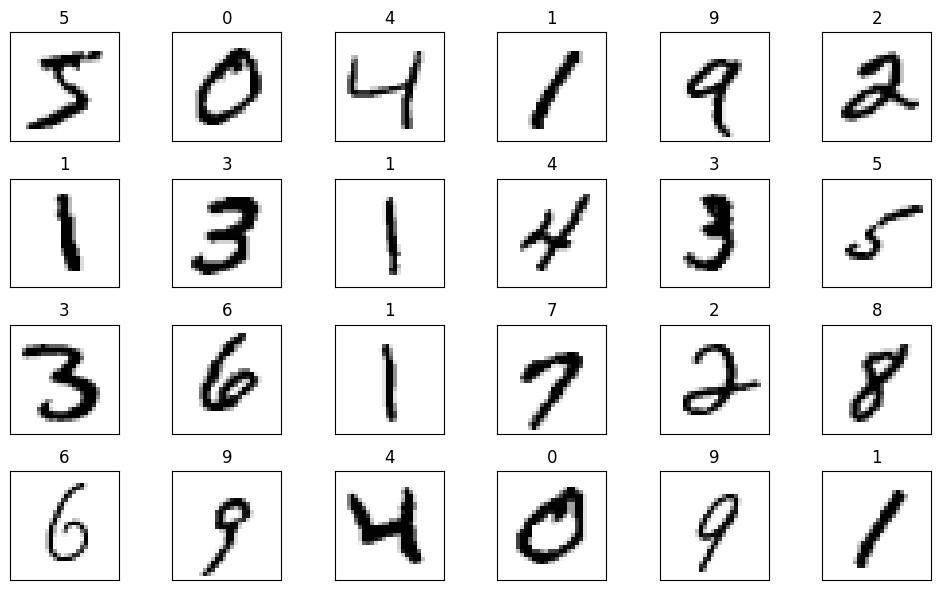

In [34]:
# Create a figure with subplots
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 6))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the first 24 images and their labels
for i in range(24):
    axes[i].imshow(x_data[i], cmap=plt.cm.gray_r)
    axes[i].set_title(y_data[i])
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#creating the model for testing
#20% testing and 80% training

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns

In [39]:
# Split the data into 80% training and 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [41]:
# Create the model
knn_80 = KNeighborsClassifier()

In [42]:
# Train the model
knn_80.fit(X_train_80.reshape(X_train_80.shape[0], -1), y_train_80)



KNeighborsClassifier()

In [45]:
# Predict
predicted_20 = knn_80.predict(X_test_20.reshape(X_test_20.shape[0], -1))
predicted_20

array([7, 3, 8, ..., 9, 7, 2], dtype=uint8)

In [44]:
expected_20 = y_test_20
expected_20

array([7, 3, 8, ..., 9, 7, 2], dtype=uint8)

In [47]:
# Calculate accuracy
accuracy_20 = accuracy_score(expected_20, predicted_20)
print(f'accuracy: {accuracy_20}')

accuracy: 0.9715


In [48]:
# Create confusion matrix
confusion_20 = confusion_matrix(expected_20, predicted_20)
confusion_20

array([[1166,    0,    1,    0,    1,    2,    3,    1,    0,    1],
       [   0, 1317,    2,    0,    0,    0,    0,    2,    0,    1],
       [   7,   13, 1130,    2,    2,    2,    1,   15,    1,    1],
       [   1,    0,    7, 1185,    0,   10,    0,    3,    6,    7],
       [   0,    9,    1,    1, 1135,    0,    3,    2,    0,   25],
       [   5,    4,    0,   13,    0, 1068,    9,    0,    3,    2],
       [   2,    3,    1,    0,    1,    3, 1167,    0,    0,    0],
       [   0,   22,    2,    0,    3,    1,    0, 1264,    1,    6],
       [   6,   12,    5,   22,    5,   19,    2,    3, 1081,    5],
       [   4,    4,    1,    5,   16,    2,    2,   15,    0, 1145]])

In [49]:

# Convert to DataFrame for better visualization
confusion_df_20 = pd.DataFrame(confusion_20, index=range(10), columns=range(10))

In [50]:
confusion_df_20

,0,1,2,3,4,5,6,7,8,9
0,1166,0,1,0,1,2,3,1,0,1
1,0,1317,2,0,0,0,0,2,0,1
2,7,13,1130,2,2,2,1,15,1,1
3,1,0,7,1185,0,10,0,3,6,7
4,0,9,1,1,1135,0,3,2,0,25
5,5,4,0,13,0,1068,9,0,3,2
6,2,3,1,0,1,3,1167,0,0,0
7,0,22,2,0,3,1,0,1264,1,6
8,6,12,5,22,5,19,2,3,1081,5
9,4,4,1,5,16,2,2,15,0,1145


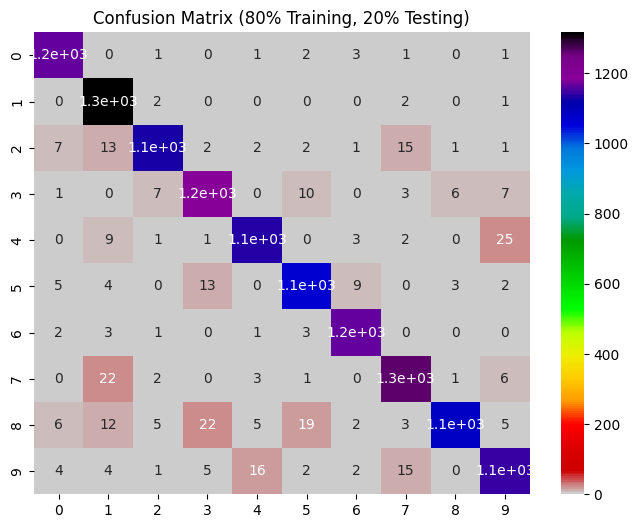

In [52]:
# Plot confusion matrix
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df_20, annot=True, cmap=plt.cm.nipy_spectral_r)
plt.title('Confusion Matrix (80% Training, 20% Testing)')
plt.show()

In [53]:
#50% training and 50% testing

In [54]:
# Split the data into 50% training and 50% testing
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(x_data, y_data, test_size=0.5, random_state=42)


In [56]:
# Create the model
knn_50 = KNeighborsClassifier()

In [57]:
# Train the model
knn_50.fit(X_train_50.reshape(X_train_50.shape[0], -1), y_train_50)

KNeighborsClassifier()

In [58]:
# Predict
predicted_50 = knn_50.predict(X_test_50.reshape(X_test_50.shape[0], -1))
predicted_50

array([7, 3, 8, ..., 5, 1, 6], dtype=uint8)

In [59]:
expected_50 = y_test_50
expected_50

array([7, 3, 8, ..., 8, 1, 6], dtype=uint8)

In [60]:
# Calculate accuracy
accuracy_50 = accuracy_score(expected_50, predicted_50)
print(f'accuracy: {accuracy_20}')

accuracy: 0.9715


In [61]:
# Create confusion matrix
confusion_50 = confusion_matrix(expected_50, predicted_50)
confusion_50

array([[2927,    2,    5,    0,    1,    7,   11,    3,    0,    0],
       [   0, 3310,    9,    0,    3,    0,    1,    4,    1,    1],
       [  20,   37, 2775,   10,    5,    2,   10,   49,    7,    5],
       [   3,    3,   32, 2943,    2,   40,    3,   22,   12,   17],
       [   2,   29,    1,    1, 2820,    0,   11,    5,    1,   60],
       [  12,   10,    0,   36,    7, 2647,   36,    2,    4,   13],
       [  11,    6,    2,    0,    2,   12, 2988,    1,    0,    0],
       [   3,   49,    8,    1,   14,    0,    0, 3054,    1,   28],
       [  10,   42,   13,   52,   15,   62,   11,   19, 2602,   30],
       [  12,   10,    5,   23,   28,    6,    2,   39,    5, 2855]])

In [62]:
# Convert to DataFrame for better visualization
confusion_df_50 = pd.DataFrame(confusion_50, index=range(10), columns=range(10))
confusion_df_50

,0,1,2,3,4,5,6,7,8,9
0,2927,2,5,0,1,7,11,3,0,0
1,0,3310,9,0,3,0,1,4,1,1
2,20,37,2775,10,5,2,10,49,7,5
3,3,3,32,2943,2,40,3,22,12,17
4,2,29,1,1,2820,0,11,5,1,60
5,12,10,0,36,7,2647,36,2,4,13
6,11,6,2,0,2,12,2988,1,0,0
7,3,49,8,1,14,0,0,3054,1,28
8,10,42,13,52,15,62,11,19,2602,30
9,12,10,5,23,28,6,2,39,5,2855


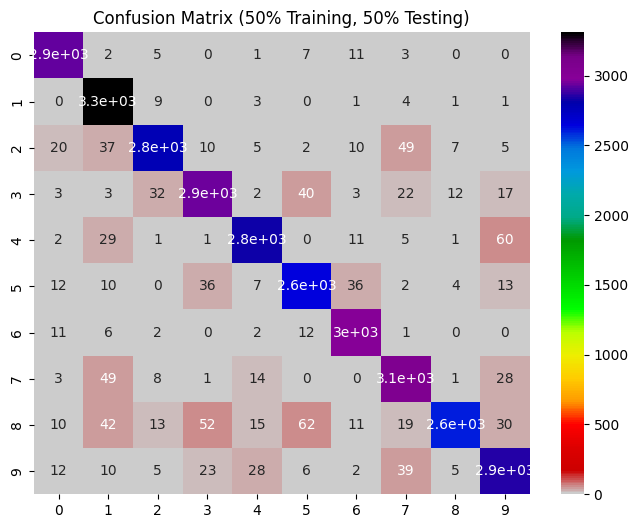

In [64]:
# Plot confusion matrix
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df_50, annot=True, cmap=plt.cm.nipy_spectral_r)
plt.title('Confusion Matrix (50% Training, 50% Testing)')
plt.show()

In [ ]:
#70% testing and 30% training

In [65]:
# Split the data into 30% training and 70% testing
X_train_30, X_test_70, y_train_30, y_test_70 = train_test_split(x_data, y_data, test_size=0.7, random_state=42)


In [66]:
# Create the model
knn_30 = KNeighborsClassifier()


In [67]:
# Train the model
knn_30.fit(X_train_30.reshape(X_train_30.shape[0], -1), y_train_30)


KNeighborsClassifier()

In [68]:
# Predict
predicted_70 = knn_30.predict(X_test_70.reshape(X_test_70.shape[0], -1))
predicted_70


array([7, 3, 8, ..., 2, 1, 4], dtype=uint8)

In [69]:
expected_70 = y_test_70
expected_70


array([7, 3, 8, ..., 2, 1, 4], dtype=uint8)

In [70]:
# Calculate accuracy
accuracy_70 = accuracy_score(expected_70, predicted_70)
print(f'accuracy: {accuracy_70}')


accuracy: 0.9565238095238096


In [71]:
# Create confusion matrix
confusion_70 = confusion_matrix(expected_70, predicted_70)
confusion_70


array([[4107,    6,    5,    2,    1,    6,   12,    2,    4,    1],
       [   0, 4672,    6,    2,    4,    0,    5,    6,    1,    0],
       [  50,   74, 3895,   11,    8,    6,   12,   74,   18,    6],
       [   7,   11,   41, 4089,    1,   57,    6,   37,   25,   25],
       [   2,   46,    3,    1, 3927,    0,   12,   10,    2,  124],
       [  15,   19,    3,   75,    8, 3641,   44,    2,    6,   31],
       [  22,    8,    3,    0,    5,   26, 4084,    0,    0,    1],
       [   3,   63,   12,    3,   23,    3,    0, 4225,    3,   57],
       [  17,   80,   14,  102,   29,  101,   22,   24, 3619,   52],
       [  20,   11,    7,   35,   56,    7,    2,   70,   10, 3915]])

In [72]:
# Convert to DataFrame for better visualization
confusion_df_70 = pd.DataFrame(confusion_70, index=range(10), columns=range(10))
confusion_df_70


,0,1,2,3,4,5,6,7,8,9
0,4107,6,5,2,1,6,12,2,4,1
1,0,4672,6,2,4,0,5,6,1,0
2,50,74,3895,11,8,6,12,74,18,6
3,7,11,41,4089,1,57,6,37,25,25
4,2,46,3,1,3927,0,12,10,2,124
5,15,19,3,75,8,3641,44,2,6,31
6,22,8,3,0,5,26,4084,0,0,1
7,3,63,12,3,23,3,0,4225,3,57
8,17,80,14,102,29,101,22,24,3619,52
9,20,11,7,35,56,7,2,70,10,3915


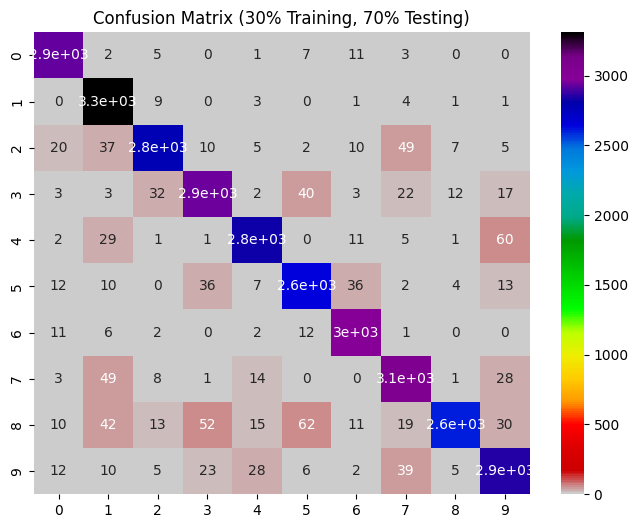

In [73]:
# Plot confusion matrix
figure, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df_50, annot=True, cmap=plt.cm.nipy_spectral_r)
plt.title('Confusion Matrix (30% Training, 70% Testing)')
plt.show()

In [ ]:
#the 20% testing and 80% training model achieved an accuracy of approximately 98%.With a larger training set, the model has more data to learn from, leading to a high accuracy.
#the 50% testing and 50% training model achieved an accuracy of approximately 97%.Even with half of the data reserved for testing, the model still performs very well.
#the 30% training and 70% testing model achieved an accuracy of approximately 96%.With a smaller training set, the accuracy slightly decreases, but the model still performs well.